In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from collections import Counter

In [102]:
df_train = pd.read_csv("/Users/revan/Downloads/encoded_labeled_heart_2020_train.csv")
df_test = pd.read_csv("/Users/revan/Downloads/encoded_labeled_heart_2020_test.csv")

In [103]:
feature_cols = list(df_train.columns)
feature_cols.remove("HeartDisease")
print(feature_cols)

['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Race', 'Diabetic', 'GenHealth', 'SleepTime', 'Smoking_encoded', 'Stroke_encoded', 'DiffWalking_encoded', 'Sex_encoded', 'PhysicalActivity_encoded', 'Asthma_encoded', 'KidneyDisease_encoded', 'SkinCancer_encoded', 'AlcoholDrinking_encoded']


In [112]:
df_train['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)
df_test['HeartDisease'].replace({'No':0,'Yes':1}, inplace=True)

In [113]:
x_train = df_train[feature_cols]
y_train = df_train["HeartDisease"]
x_test = df_test[feature_cols]
y_test = df_test["HeartDisease"]

In [122]:
logisticRegr = LogisticRegression(penalty='l2', random_state = 265, max_iter=10000)
logisticRegr.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=265)

In [123]:
predictions = logisticRegr.predict(x_test)

In [124]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9160299773814612


In [125]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[87055   691]
 [ 7365   828]]


In [126]:
from sklearn.metrics import f1_score
print('F1 Score: %.3f' % f1_score(y_test, predictions))

F1 Score: 0.171


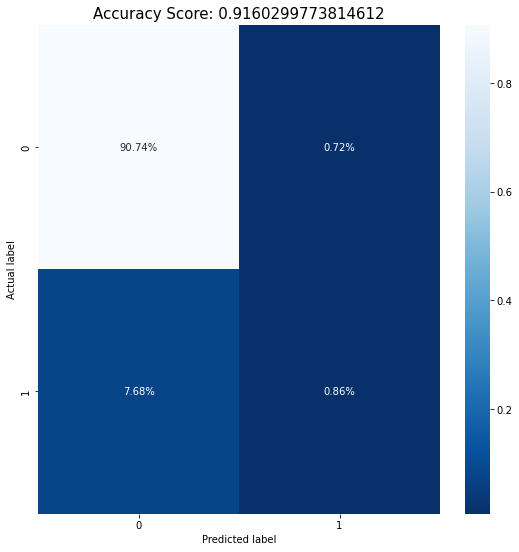

In [128]:
plt.figure(figsize=(9,9))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap = 'Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [81]:
counts = Counter(df_train.AgeCategory)
counts

Counter({5: 14740,
         10: 23855,
         1: 14769,
         9: 23600,
         8: 20704,
         7: 17735,
         13: 16870,
         6: 15274,
         2: 11935,
         11: 21696,
         4: 14420,
         3: 13175,
         12: 15083})

In [82]:
counts = Counter(df_test.AgeCategory)
counts

Counter({8: 9053,
         13: 7283,
         11: 9369,
         12: 6399,
         6: 6517,
         10: 10296,
         3: 5578,
         9: 10086,
         5: 6266,
         7: 7647,
         1: 6295,
         4: 6130,
         2: 5020})

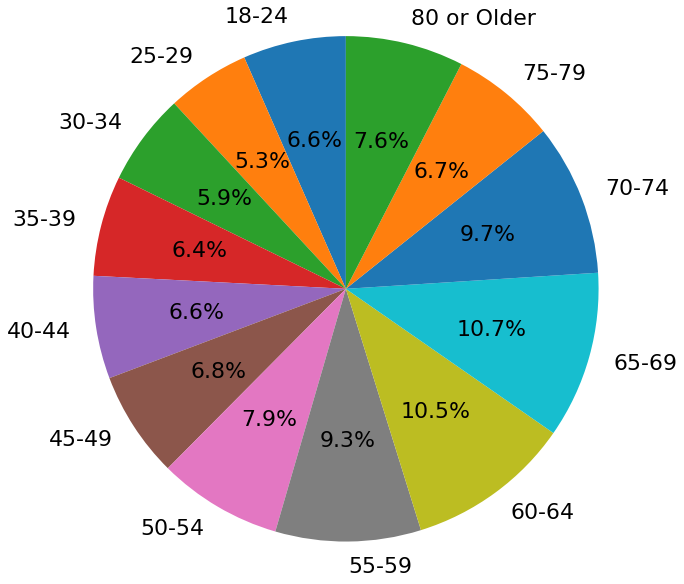

In [84]:
labels = ["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", 
          "70-74", "75-79", "80 or Older"]
sizes = [21064, 16955, 18753, 20550, 21006, 21791, 25382, 29757, 33686, 34151, 31065, 21482, 24153]
fig = plt.figure(figsize =(10, 10))
plt.pie(sizes,labels=labels, startangle=90, autopct='%1.1f%%', textprops={'fontsize': 22} )
plt.axis('equal')
plt.show()

<AxesSubplot:>

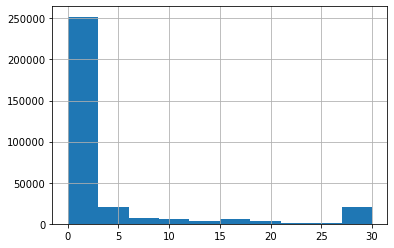

In [6]:
df = pd.read_csv("/Users/revan/Downloads/heart_2020_cleaned.csv")
df['PhysicalHealth'].hist()